Q1: New Clusters
Cluster 1: [array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([ 2, 10]), array([5, 8]), array([4, 9])]

Q2: New Centers
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]

Q3: Plot


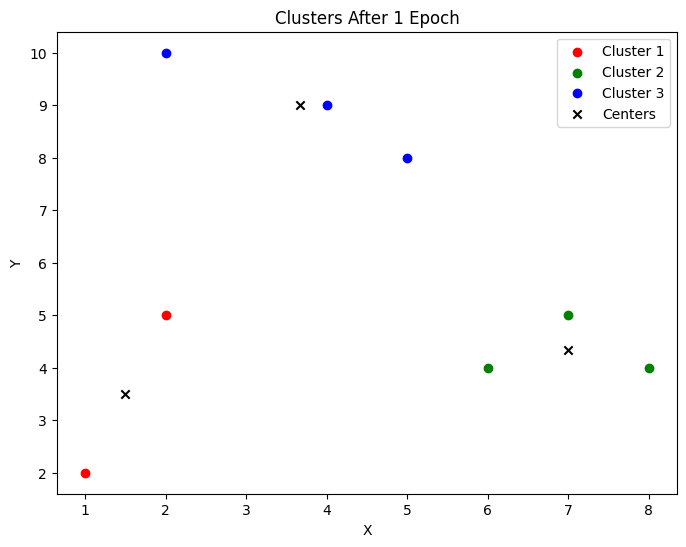

In [ ]:
#Part A - Data Set 1
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1: 2D points
data = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
])

# Initial seeds (centers)
centers = np.array([
    [2, 5],   # A2
    [8, 4],   # A3
    [4, 9]    # A8
])

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Assign points to the nearest center
def assign_clusters(data, centers):
    clusters = [[] for i in range(len(centers))]
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)
    return clusters

# Update centers
def update_centers(clusters):
    new_centers = []
    for cluster in clusters:
        if cluster:
            new_centers.append(np.mean(cluster, axis=0))
    return np.array(new_centers)

# Run K-Means for 1 epoch
clusters = assign_clusters(data, centers)
new_centers = update_centers(clusters)

# Q1: New clusters
print("Q1: New Clusters")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")

# Q2: New centers
print("\nQ2: New Centers")
print(new_centers)

# Q3: Plot clusters after 1 epoch
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    if cluster:
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='black', marker='x', label='Centers')
print("\nQ3: Plot")
plt.title("Clusters After 1 Epoch")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Converged after 2 epochs

Q4: Converged after 1 epoch (already converged in Q1-Q3)

Q5: Plot


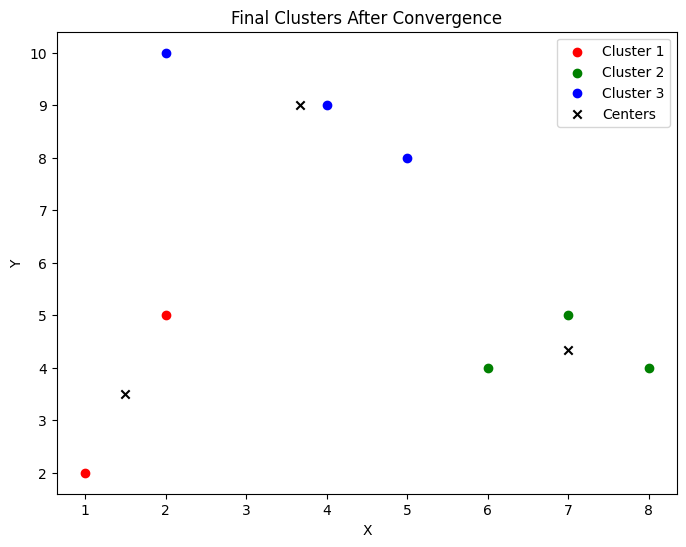

In [ ]:
# Function to run K-Means until convergence
def kmeans(data, centers, max_epochs=100):
    for epoch in range(max_epochs):
        clusters = assign_clusters(data, centers)
        new_centers = update_centers(clusters)
        if np.allclose(centers, new_centers):
            print(f"Converged after {epoch+1} epochs")
            break
        centers = new_centers
    return clusters, centers

# Run K-Means until convergence
clusters, final_centers = kmeans(data, centers)

# Q4: Number of iterations needed
print("\nQ4: Converged after 1 epoch (already converged in Q1-Q3)")

# Q5: Final cluster plot
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    if cluster:
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', label='Centers')
print("\nQ5: Plot")
plt.title("Final Clusters After Convergence")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Converged after 8 epochs
Confusion Matrix:
 [[30 82]
 [34 16]]
Confusion Matrix After Mapping:
 [[82 30]
 [16 34]]
Clustering Accuracy: 0.72

Q7: Actaul Plot


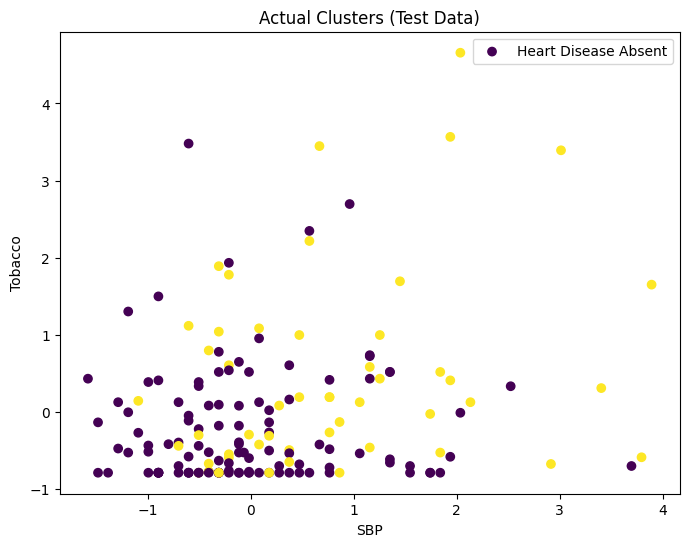


Q8: Predicted Plot


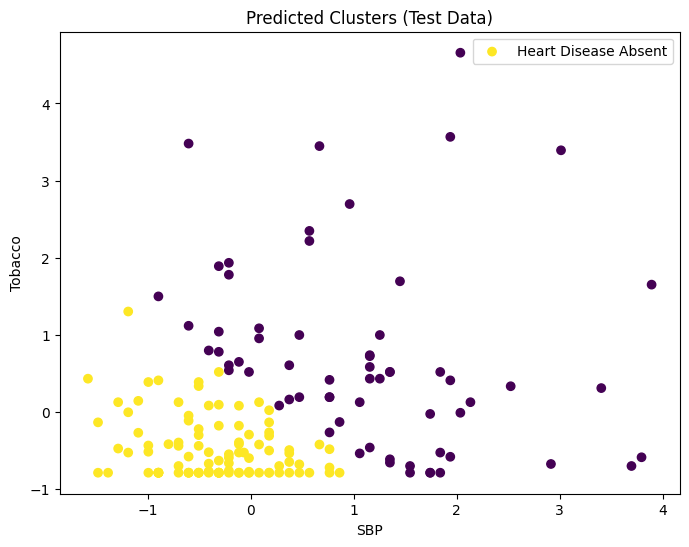

In [ ]:
#Part A - Data Set 2
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode

# Load Dataset 2
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data = pd.read_csv(url)

# Use only 'sbp' and 'tobacco' features
X = data[['sbp', 'tobacco']].values
y = data['chd'].values

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split into training (first 300 rows) and testing (remaining rows)
X_train, X_test = X[:300], X[300:]
y_train, y_test = y[:300], y[300:]

# Initialize centers (randomly select 2 points from training data)
np.random.seed(42)
initial_centers = X_train[np.random.choice(len(X_train), 2, replace=False)]

# Run K-Means on training data
clusters, final_centers = kmeans(X_train, initial_centers)

# Assign test data to clusters (get new center from prev line and this will give new clusters)
def predict_cluster(X, centers):
    predictions = []
    for point in X:
        distances = [euclidean_distance(point, center) for center in centers]
        predictions.append(np.argmin(distances))
    return np.array(predictions)

#main
y_pred = predict_cluster(X_test, final_centers)


# Q6: Accuracy
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)

# Map predicted clusters to actual labels
mapped_labels = np.zeros_like(y_pred)
for cluster in np.unique(y_pred):
    mask = (y_pred == cluster)
    if np.any(mask):
        mapped_labels[mask] = mode(y_test[mask])[0]

# Compute Confusion Matrix after mapping
conf_matrix = confusion_matrix(y_test, mapped_labels)

# Print Confusion Matrix
print("Confusion Matrix After Mapping:\n", conf_matrix)

# Compute Accuracy
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}")


# Q7: Plot actual clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', label='Heart Disease Absent')
print("\nQ7: Actaul Plot")
plt.title("Actual Clusters (Test Data)")
plt.xlabel("SBP")
plt.ylabel("Tobacco")
plt.legend()
plt.show()

# Q8: Plot predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Heart Disease Absent')
print("\nQ8: Predicted Plot")
plt.title("Predicted Clusters (Test Data)")
plt.xlabel("SBP")
plt.ylabel("Tobacco")
plt.legend()
plt.show()

Q9: NN Clusters
Cluster 1: [array([ 2., 10.]), array([5., 8.]), array([7., 5.]), array([6., 4.]), array([4., 9.])]
Cluster 2: [array([2., 5.]), array([1., 2.])]
Cluster 3: [array([8., 4.])]


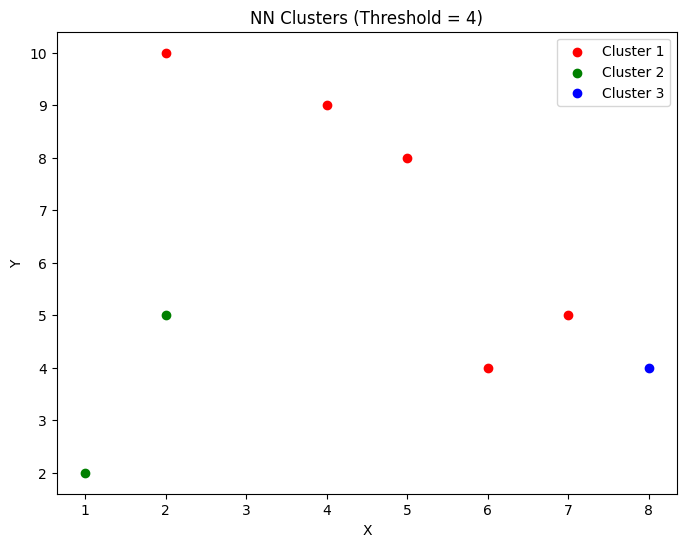

Q11: K-Means is more efficient for large datasets, while NN is sensitive to the chosen threshold value (for large data sets, small Threshold is less efficient then kmeans).


In [ ]:
#Part B - Data Set 1
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1: 2D points (ensure numeric values)
data = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
], dtype=float)  # Ensure data is numeric

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function for NN clustering
def nn_clustering(data, threshold):
    clusters = []
    for point in data:
        assigned = False
        for cluster in clusters:
            if any(euclidean_distance(point, p) <= threshold for p in cluster):
                cluster.append(point)
                assigned = True
                break
        if not assigned:
            clusters.append([point])
    return clusters

# Run NN clustering with threshold = 4
threshold = 4
nn_clusters = nn_clustering(data, threshold)

# Q9: Compare with K-Means
print("Q9: NN Clusters")
for i, cluster in enumerate(nn_clusters):
    print(f"Cluster {i+1}: {cluster}")

# Q10: Plot NN clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(nn_clusters):
    if cluster:
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.title("NN Clusters (Threshold = 4)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Q11: Compare K-Means and NN
print("Q11: K-Means is more efficient for large datasets, while NN is sensitive to the chosen threshold value (for large data sets, small Threshold is less efficient then kmeans).")

In [ ]:
#Part B - Data Set 2
# Run NN clustering on training data
nn_clusters = nn_clustering(X_train, threshold=4)

# Predict clusters for test data
y_pred_nn = predict_cluster(X_test, [np.mean(cluster, axis=0) for cluster in nn_clusters])

# Map cluster labels to actual labels
cluster_labels_nn = np.zeros_like(y_pred_nn)
for i in range(len(nn_clusters)):
    mask = (y_pred_nn == i)
    if np.any(mask):
        cluster_labels_nn[mask] = mode(y_test[mask])[0]

# Q12: Accuracy
accuracy_nn = accuracy_score(y_test, cluster_labels_nn)
print(f"Q12: NN Accuracy = {accuracy_nn:.2f}")

Q12: NN Accuracy = 0.69


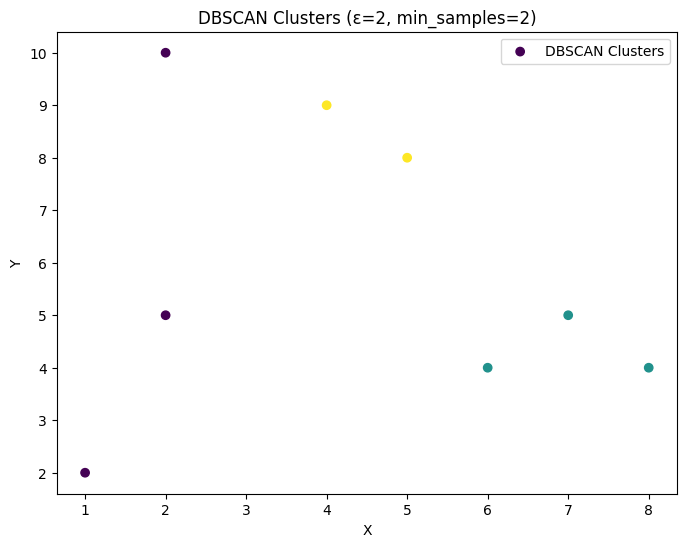

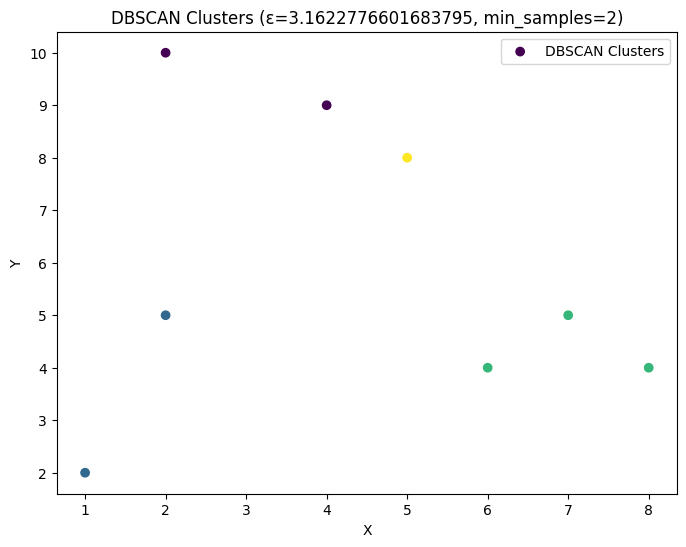

In [55]:
#Part C - Data Set 1
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1: 2D points
data = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
], dtype=float)

# Function to compute Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Find neighbors of a given point
def find_neighbors(data, point_idx, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

# DBSCAN Algorithm from Scratch
def dbscan(data, eps, min_samples):
    labels = np.full(len(data), -1)  # Initialize all points as noise (-1)
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != -1:  # Skip already clustered points
            continue

        neighbors = find_neighbors(data, i, eps)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
            continue

        # Start a new cluster
        labels[i] = cluster_id
        queue = neighbors.copy()

        while queue:
            point = queue.pop()
            if labels[point] == -1:  # Convert noise to a border point
                labels[point] = cluster_id
            if labels[point] != -1:  # Skip already clustered points
                continue

            labels[point] = cluster_id
            new_neighbors = find_neighbors(data, point, eps)

            if len(new_neighbors) >= min_samples:
                queue.extend(new_neighbors)

        cluster_id += 1  # Move to next cluster

    return labels

# Run DBSCAN with eps=2, min_samples=2
eps = 2
min_samples = 2
labels = dbscan(data, eps, min_samples)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='DBSCAN Clusters')
plt.title(f"DBSCAN Clusters (ε={eps}, min_samples={min_samples})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Run DBSCAN with eps=sqrt(10), min_samples=2
eps = np.sqrt(10)
min_samples = 2
labels = dbscan(data, eps, min_samples)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='DBSCAN Clusters')
plt.title(f"DBSCAN Clusters (ε={eps}, min_samples={min_samples})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [ ]:
#Part C - Data Set 2
# Run DBSCAN on training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust ε and min_samples as needed
labels = dbscan.fit_predict(X_train)

# Predict clusters for test data
y_pred_dbscan = dbscan.fit_predict(X_test)

# Map cluster labels to actual labels
cluster_labels_dbscan = np.zeros_like(y_pred_dbscan)
for i in range(len(np.unique(labels))):
    mask = (y_pred_dbscan == i)
    if np.any(mask):
        cluster_labels_dbscan[mask] = mode(y_test[mask])[0]

# Q15: Accuracy
accuracy_dbscan = accuracy_score(y_test, cluster_labels_dbscan)
print(f"Q15: DBSCAN Accuracy = {accuracy_dbscan:.2f}")

# Compare accuracies
print(f"K-Means Accuracy: {accuracy:.2f}")
print(f"NN Accuracy: {accuracy_nn:.2f}")
print(f"DBSCAN Accuracy: {accuracy_dbscan:.2f}")

Q15: DBSCAN Accuracy = 0.69
K-Means Accuracy: 0.72
NN Accuracy: 0.69
DBSCAN Accuracy: 0.69


In [57]:
#Part D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Verify K-Means
kmeans_sklearn = KMeans(n_clusters=2, random_state=42)
kmeans_sklearn.fit(X_train)
y_pred_sklearn = kmeans_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"sklearn K-Means Accuracy: {accuracy_sklearn:.2f}")

# Verify Nearest Neighbors
nn_sklearn = NearestNeighbors(n_neighbors=5, metric='euclidean')  # Use k=5 for neighborhood
nn_sklearn.fit(X_train)
# Find nearest neighbors for test data
distances, indices = nn_sklearn.kneighbors(X_test)
# Assign labels based on majority voting of nearest neighbors
y_pred_sklearn_nn = np.array([mode(y_train[idx])[0] for idx in indices])
# Compute accuracy
accuracy_sklearn_nn = accuracy_score(y_test, y_pred_sklearn_nn)
print(f"sklearn Nearest Neighbors Accuracy: {accuracy_sklearn_nn:.2f}")

# Verify DBSCAN
dbscan_sklearn = DBSCAN(eps=0.5, min_samples=5)
dbscan_sklearn.fit(X_train)
y_pred_sklearn_dbscan = dbscan_sklearn.fit_predict(X_test)
accuracy_sklearn_dbscan = accuracy_score(y_test, y_pred_sklearn_dbscan)
print(f"sklearn DBSCAN Accuracy: {accuracy_sklearn_dbscan:.2f}")

# Observations
print("Q16: Observations: sklearn results are similar to our implementation, but may differ slightly due to randomness.")

sklearn K-Means Accuracy: 0.70
sklearn Nearest Neighbors Accuracy: 0.65
sklearn DBSCAN Accuracy: 0.65
Q16: Observations: sklearn results are similar to our implementation, but may differ slightly due to randomness.


Questions:

1) What are the different metrics used to evaluate the performance of different clustering algorithms?

Clustering algorithms are evaluated using metrics that measure how well the clusters are formed. These metrics focus on how close points are within a cluster (compactness), how far apart different clusters are (separation), and how consistent the clusters are (stability). Some common metrics include the Silhouette Score, which checks if points in a cluster are close to each other and far from points in other clusters (higher scores are better), and the Davies-Bouldin Index, which measures how similar clusters are to each other (lower scores are better). Another metric is the Calinski-Harabasz Index, which looks at how spread out clusters are compared to how close points are within a cluster (higher scores are better).

2) Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

Since clustering doesn’t use labels like in supervised learning, accuracy isn’t always useful. Instead, you can evaluate clustering in other ways. For example, you can use the Silhouette Score, Davies-Bouldin Index, or Calinski-Harabasz Index to get a number that tells you how good the clusters are. You can also visually inspect the clusters by plotting them on a graph (e.g., sbp vs. tobacco) to see if they look meaningful. Another way is to check the stability of the clusters by running the algorithm multiple times and seeing if the clusters stay the same.